In [ ]:
Research Question

Are more economically developed countries less religious than less economically developed countries?

In [ ]:
Links to the Datasets
http://data.un.org/Data.aspx?d=POP&f=tableCode%3A28
https://unstats.un.org/unsd/snaama/Index


In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filepathExcel = '/Users/jpar746/Desktop/GDP.xls'
filepath = '/Users/jpar746/Desktop/Religion.csv'
religion = pd.read_csv(filepath)
gdp = pd.read_excel(filepathExcel, skiprows = 2)


In [237]:
# Cleaning up the Data, Looking at only the necessary data
# GDP of all the countries in 2017
gdp = gdp[['Country','IndicatorName',2017]]
gdp = gdp.loc[gdp['IndicatorName'] == 'Final consumption expenditure']
gdp = gdp[['Country',2017]]

# % Religious of each country
religion = religion.loc[(religion['Religion'] == 'Total') | 
                        (religion['Religion'] == 'Atheist') | 
                        (religion['Religion'] == 'No Religion') |
                        (religion['Religion'] == 'None') |
                        (religion['Religion'] == 'No religion') |
                        (religion['Religion'] == 'None or Refused') |
                        (religion['Religion'] == 'No Affliation') |
                        (religion['Religion'] == 'Not Stated') |
                        (religion['Religion'] == 'Refused to answer') |
                        (religion['Religion'] == 'Not Declared')
                       ]
religion = religion.loc[religion['Sex'] == 'Both Sexes']
religion = religion.loc[religion['Area'] == 'Total']
religion = religion[['Country or Area','Year','Religion','Value']]
religion['Religion'] = religion['Religion'].map({'Total':'Total','Atheist':'Not Religious','No Religion':'Not Religious',
                                                'None':'Not Religious','No religion':'Not Religious','None or Refused':'Not Religious',
                                                'No Affliation':'Not Religious','Not Stated':'Not Religious','Refused to answer':'Not Religious',
                                                'Not Declared':'Not Religious'})

n = 2011
country = 'Albania'

for index, row in religion.iterrows():
    if row[0] == country:
        if int(row[1]) == n:
            pass
        else:
            religion.drop(index, inplace=True)
    else:
        country = row[0]
        n = int(row[1])

religion = religion.groupby(['Country or Area','Religion'])['Value'].sum()
religion = religion.unstack()
religion.dropna(inplace=True)

In [238]:
# Merge gdp and religion Dataframes
df = pd.merge(religion, gdp, how='inner', left_on = 'Country or Area', right_on = 'Country')
df['% Religious'] = (1-(df['Not Religious']/df['Total']))* 100
df = df[['Country', 2017, '% Religious']]
df = df.append({'Country':'United States',2017:19390000000000,'% Religious': 78.3},ignore_index=True)
df = df.append({'Country':'China',2017:12240000000000,'% Religious':26.44},ignore_index=True)
#Adding values of the U.S. and China as they are some of the biggest GDPs 
print(df.head())

               Country          2017  % Religious
0              Albania  1.202642e+10    81.285172
1             Anguilla  2.665391e+08    96.010499
2  Antigua and Barbuda  1.180715e+09    94.180995
3                Aruba  2.240223e+09    93.949785
4            Australia  1.060708e+12    61.260077
          Country          2017  % Religious
80  United States  1.939000e+13         78.3


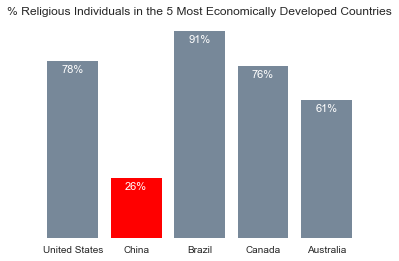

In [264]:
df.sort_values(2017, ascending = False, inplace=True)
topdf = df[0:5]
lastdf = df[-5:]

# Sint Marrten Dutch Part is too long, so reduced to Sint Maarten
lastdf.loc[lastdf['Country'] == 'Sint Maarten (Dutch part)'] = 'Sint Maarten'

plt.figure()
bars = plt.bar(topdf['Country'],topdf['% Religious'], align='center', linewidth=0, color='lightslategrey')
bars[1].set_color('#FF0000')
plt.title('% Religious Individuals in the 5 Most Economically Developed Countries')
plt.grid(False)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#Labeling Values of the graph
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='white', fontsize=11)

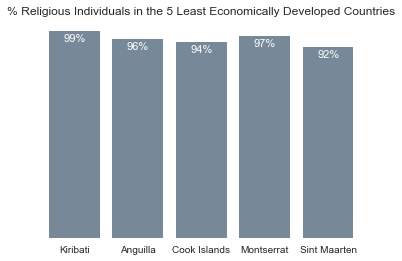

In [266]:
plt.figure()
bars2 = plt.bar(lastdf['Country'],lastdf['% Religious'],align = 'center', linewidth=0, color='lightslategrey')
plt.title('% Religious Individuals in the 5 Least Economically Developed Countries')
plt.grid(False)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars2:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)

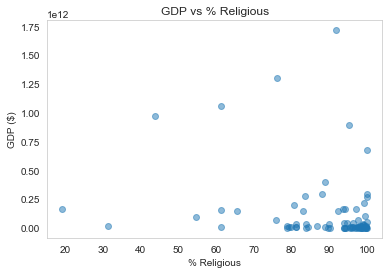

In [273]:
# Ignoring the outliers of the two largest GDPs in the world
df = df[~(df['Country'] == 'United States')]
df = df[~(df['Country'] == 'China')]

plt.scatter(df['% Religious'],df[2017], alpha = 0.5)
plt.grid(False)
plt.title('GDP vs % Religious')
plt.xlabel('% Religious')
plt.ylabel('GDP ($)')
plt.show()

These 2 bar charts and Scatter plot were created to answer the question if more economically developed countries were less religious than less economically developed countries. The 2017 GDP was compared against the % Religious from the most recent year. The data for this analysis were all collected from the United Nation's Datasite. 

From the scatter plot, we cannot see a clear relationship between the GDP and % Religious. We can identify that majority of nations that have a lower gdp tend to be clustered with a higher percentage of people who are religious. As the scatter plot did not give a clear indication of the relationship between those two. I decided to plot the 5 most economically developed countries and the 5 least economially developed countries to get a better understanding of the data. From the bar chart, we can identify that from just looking at the five most economically developed countries, the percentage of individuals who are religious is especially low in China and is around the 70 percent. If we compare this to the 5 least economically developed countries, their percentage of individiuals who are religious are around 90%. 

While, we do not have a clear indication that the % religious has an impact on GDP, we can see that the 5 most economically developed countries are less religious than 5 least economically developed countries. 